In [1]:
# All the packages needed 
import glob2
import os
import matplotlib.pyplot as plt 
from matplotlib import rc
from tqdm import tqdm
from scipy.fftpack import fft
import numpy as np

In [2]:
# Acquiring all the file list to extract data from

fileDir = "/home/srj_bruh/Acads/nematics_project/data/job2502280/"

listFiles = glob2.glob(fileDir+"dir"+"*.dat")
numOnlyListFiles = []

for i in tqdm(listFiles):
    numOnlyListFiles.append(int(i[len(fileDir+"dir"):-4]))
numOnlyListFiles.sort()

listFiles = []

for i in numOnlyListFiles:
    listFiles.append(fileDir+"dir"+str(i)+".dat")

100%|██████████| 77/77 [00:00<00:00, 154158.19it/s]


In [3]:
# Initialization of the fourier transform field and the function to determine

nx = 400
ny = 400

# Number of samplepoints
N = nx
# sample spacing
T = 1.0

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
xf = xf[1:]

time_axis = np.linspace(0,len(numOnlyListFiles),len(numOnlyListFiles))

def get_qSpectrum(dataFile):
    yf = fft(dataFile)
    return 2.0/N * np.abs(yf[:N//2])

/home/srj_bruh/anaconda3/envs/thampipaper/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [4]:
# Fourier transforming the entire domain and averaging it out 

time_q_data = []

for i in tqdm(listFiles):
    dataFile = [] 
    with open(i,"r") as f:
        data = f.readlines()
        for line in data:
            words = line.split()
            dataFile.append(float(words[3])*10**-5)
            
    q_total = np.zeros((N//2,))
    
    for j in range(ny):
        data_segment = dataFile[j*nx:(j+1)*nx] 
        q_spectrum = get_qSpectrum(data_segment)
        q_total = q_total+ q_spectrum  
    
    q_total = q_total/N
    time_q_data.append(q_spectrum[1:])

time_q_data = np.array(time_q_data)

100%|██████████| 77/77 [00:07<00:00,  9.68it/s]


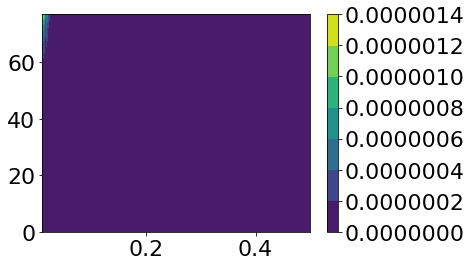

In [6]:
# Plotting of the q_spectrum

plt.contourf(xf,time_axis,time_q_data)
plt.rcParams.update({'font.size': 22})
rc('xtick', labelsize=22)
rc('ytick', labelsize=22)
plt.xlim(0.01,0.5)
plt.colorbar()

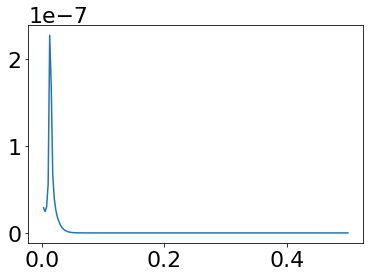

In [10]:
plt.plot(xf,time_q_data[123])

501